In [2]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Import test dataset with 'uri' and take just that column**

In [49]:
df_w_uri = pd.read_csv('recs_library_2.csv', index_col=0)

In [50]:
uri = df_w_uri.loc[:, 'uri']
uri = pd.DataFrame(uri)
uri

,uri
0,spotify:track:72794Eag03xdy7TO0KNuid
1,spotify:track:4uTvPEr01pjTbZgl7jcKBD
2,spotify:track:40cayr7aVuRU8lXVn1PSpx
3,spotify:track:7sKDftgGirHWTVFMtJoDoh
4,spotify:track:00mBzIWv5gHOYxwuEJXjOG
...,...
1096,spotify:track:2d40kroNsSMLNHMC04wQ9P
1097,spotify:track:5MVrZa7cDtnAoMvCgRAMqb
1098,spotify:track:6fracv4du3sDwo1XKcPrkw
1099,spotify:track:1MmwJ9hzIRw6lMEEeeZDd8


#### The original dataset (pulled from Spotify API)

In [10]:
df = pd.read_csv('music_prefs.csv', index_col=0)

In [11]:
# We need to keep the uri in the dataset

df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_popularity,explicit,artists,genres,album_popularity,artist_popularity,like
0,0.489,0.516,1,-8.921,0,0.3080,0.4460,0.00000,0.0832,0.172,149.611,95160,4,49,True,['Damso'],"[['belgian hip hop', 'french hip hop', 'pop ur...",[66],[75],1
1,0.662,0.436,9,-12.900,0,0.0651,0.8530,0.00000,0.0624,0.627,92.857,178293,4,47,False,['Jean Leloup'],"[['indie quebecois', 'pop quebecois', 'rock qu...",[45],[51],1
2,0.517,0.928,4,-8.881,0,0.0448,0.0145,0.02330,0.4810,0.728,90.593,172707,4,31,False,['Jean Leloup'],"[['indie quebecois', 'pop quebecois', 'rock qu...",[38],[51],1
3,0.820,0.407,4,-11.301,0,0.0387,0.7710,0.00544,0.1130,0.770,125.642,138027,4,42,False,['Jean Leloup'],"[['indie quebecois', 'pop quebecois', 'rock qu...",[45],[51],1
4,0.452,0.579,2,-11.085,1,0.0476,0.0153,0.89300,0.6370,0.929,84.615,213760,4,61,False,['Khruangbin'],"[['funk', 'indie soul', 'neo-psychedelic', 'so...",[68],[72],1


In [12]:
df.shape

(2376, 20)

#### Changing 'album_popularity' from string to int

In [13]:
# album_popularity -- from string to int

for i in range(len(df)):
    n = df.loc[i, 'album_popularity']
    n = n[1:-1].split(',')
    n = int(n[0])
    df.loc[i, 'album_popularity'] = n    

#### Changing 'artist_popularity' from string to mean int

In [14]:
# artist_popularity -- from string to int (mean of all artists)

for i in range(len(df)):
    n = df.loc[i, 'artist_popularity']
    n = n[1:-1].split(',')
    
    for j in range(len(n)):
        n[j] = int(n[j])
        
    n = statistics.mean(n)
    df.loc[i, 'artist_popularity'] = n

#### Creating one-hot encoded variables for music genres

In [15]:
df['r&b'] = 0
df['pop'] = 0
df['rap'] = 0
df['hip hop'] = 0
df['funk'] = 0
df['rock'] = 0

In [16]:
for i in range(len(df)):
    genres = df.loc[i, 'genres']
    if 'hip hop' in genres:
        df.loc[i, 'hip hop'] = 1
    if 'pop' in genres:
        df.loc[i, 'pop'] = 1
    if 'rap' in genres:
        df.loc[i, 'rap'] = 1
    if 'r&b' in genres:
        df.loc[i, 'r&b'] = 1
    if 'funk' in genres:
        df.loc[i, 'funk'] = 1
    if 'rock' in genres:
        df.loc[i, 'rock'] = 1

In [17]:
print("# of r&b songs in this df: " + str(sum(df['r&b'])))
print("# of pop songs in this df: " + str(sum(df['pop'])))
print("# of rap songs in this df: " + str(sum(df['rap'])))
print("# of hip hop songs in this df: " + str(sum(df['hip hop'])))
print("# of funk songs in this df: " + str(sum(df['funk'])))
print("# of rock songs in this df: " + str(sum(df['rock'])))

# of r&b songs in this df: 271
# of pop songs in this df: 1084
# of rap songs in this df: 677
# of hip hop songs in this df: 739
# of funk songs in this df: 112
# of rock songs in this df: 443


#### Dropping artists and genres

In [18]:
df = df.drop(['artists', 'genres'], axis=1)

#### Changing 'explicit' from boolean to numeric

In [19]:
df['explicit'] = (df['explicit']==True).astype(int)

#### Changing milliseconds to minutes

In [20]:
df['duration_min'] = (df['duration_ms']/(1000*60))%60
df = df.drop('duration_ms',axis = 1)

#### Checking if there are any null values

In [21]:
df.isnull().any()

danceability         False
energy               False
key                  False
loudness             False
mode                 False
speechiness          False
acousticness         False
instrumentalness     False
liveness             False
valence              False
tempo                False
time_signature       False
song_popularity      False
explicit             False
album_popularity     False
artist_popularity    False
like                 False
r&b                  False
pop                  False
rap                  False
hip hop              False
funk                 False
rock                 False
duration_min         False
dtype: bool

#### The resulting dataframe:

- 2376 songs
- 24 columns -- 23 predictors, 1 target variable


In [22]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,album_popularity,artist_popularity,like,r&b,pop,rap,hip hop,funk,rock,duration_min
0,0.489,0.516,1,-8.921,0,0.3080,0.4460,0.00000,0.0832,0.172,...,66,75,1,0,1,1,1,0,0,1.586000
1,0.662,0.436,9,-12.900,0,0.0651,0.8530,0.00000,0.0624,0.627,...,45,51,1,0,1,0,0,0,1,2.971550
2,0.517,0.928,4,-8.881,0,0.0448,0.0145,0.02330,0.4810,0.728,...,38,51,1,0,1,0,0,0,1,2.878450
3,0.820,0.407,4,-11.301,0,0.0387,0.7710,0.00544,0.1130,0.770,...,45,51,1,0,1,0,0,0,1,2.300450
4,0.452,0.579,2,-11.085,1,0.0476,0.0153,0.89300,0.6370,0.929,...,68,72,1,0,0,0,0,1,0,3.562667


In [23]:
df.shape

(2376, 24)

## Data Visualization

The dataset contains 1084 'liked' songs and 1286 'disliked' songs.

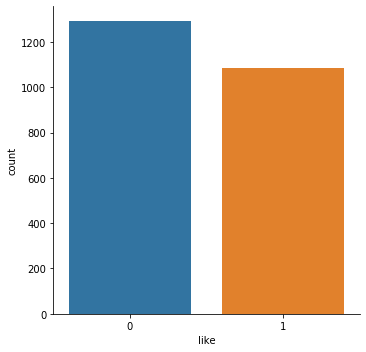

In [14]:
sns.catplot(data = df, x='like', kind='count')

#### Importing the data

In [10]:
df = pd.read_csv('final_df.csv')
df = df.drop(columns=['Unnamed: 0'])

In [11]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,album_popularity,artist_popularity,like,r&b,pop,rap,hip hop,funk,rock,duration_min
0,0.489,0.516,1,-8.921,0,0.3080,0.4460,0.00000,0.0832,0.172,...,66,75.0,1,0,1,1,1,0,0,1.586000
1,0.662,0.436,9,-12.900,0,0.0651,0.8530,0.00000,0.0624,0.627,...,45,51.0,1,0,1,0,0,0,1,2.971550
2,0.517,0.928,4,-8.881,0,0.0448,0.0145,0.02330,0.4810,0.728,...,38,51.0,1,0,1,0,0,0,1,2.878450
3,0.820,0.407,4,-11.301,0,0.0387,0.7710,0.00544,0.1130,0.770,...,45,51.0,1,0,1,0,0,0,1,2.300450
4,0.452,0.579,2,-11.085,1,0.0476,0.0153,0.89300,0.6370,0.929,...,68,72.0,1,0,0,0,0,1,0,3.562667


In [12]:
df.shape

(2376, 24)

### Model Selection

In [13]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

#### Class and function definitions

In [14]:
class SKModel:
    def __init__(self, model):
        if model == 0:
            self.clf = LogisticRegression()
        elif model == 1:
            self.clf = RandomForestClassifier()
        elif model == 2:
            self.clf = LDA()
        elif model == 3:
            self.clf = QDA()
        elif model == 4:
            self.clf = KNeighborsClassifier()
        elif model == 5:
            self.clf = DecisionTreeClassifier()
        elif model == 6: 
            self.clf = GaussianNB()
        elif model == 7:
            self.clf = SVC(probability=True)
        else:
            self.clf = None

        self.cv_k = 10
        self.scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
        self.scores = pd.DataFrame(columns=['Model','Fitting Time', 'Scoring Time', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC_ROC'])


    def cross_validate(self, X_train, y_train, mod):
        sc = cross_validate(self.clf, X_train, y_train, scoring = self.scoring, cv = self.cv_k)
        sorted(sc.keys())
        self.scores['Model'] = [mod]
        self.scores['Fitting Time'] = [sc['fit_time'].mean()]
        self.scores['Scoring Time'] = sc['score_time'].mean()
        self.scores['Accuracy'] = sc['test_accuracy'].mean()
        self.scores['Precision'] = sc['test_precision_macro'].mean()
        self.scores['Recall'] = sc['test_recall_macro'].mean()
        self.scores['F1 Score'] = sc['test_f1_weighted'].mean()
        self.scores['AUC_ROC'] = sc['test_roc_auc'].mean()
    

    def generate_predictions(self, X_train, y_train, X_test):
        self.clf.fit(X_train, y_train)
        predictions = self.clf.predict(X_test)
        return predictions

    def evaluate(self, y_test, predictions):
        print(confusion_matrix(y_test, predictions))
        print(classification_report(y_test, predictions))

#### Testing/training data preparation

In [18]:
X = df.loc[:, df.columns!='like']
y = df.loc[:, df.columns=='like']

In [19]:
data = {'idx': list(X.index), 'label': y.loc[:, 'like'].to_list()}

In [20]:
# Formatting for NN

temp = pd.DataFrame(data=data)
list_ids = list(X.index)
labels = temp.set_index('idx').T.to_dict('list')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Initial Model Creation

In [22]:
log_mod = SKModel(0)
random_forest_mod = SKModel(1)
lda_mod = SKModel(2)
qda_mod = SKModel(3)
knn_mod = SKModel(4)
dec_tree_mod = SKModel(5)
nb_mod = SKModel(6)
svc_mod = SKModel(7)

In [23]:
log_mod.cross_validate(X_train, y_train, 'Logistic Regression')
random_forest_mod.cross_validate(X_train, y_train, 'Random Forest')
lda_mod.cross_validate(X_train, y_train, 'LDA')
qda_mod.cross_validate(X_train, y_train, 'QDA')
knn_mod.cross_validate(X_train, y_train, 'K-Nearest Neighbors')
dec_tree_mod.cross_validate(X_train, y_train, 'Decision Tree')
nb_mod.cross_validate(X_train, y_train, 'Naive Bayes')
svc_mod.cross_validate(X_train, y_train, 'Support Vector Machines')

In [24]:
models_init = pd.DataFrame(columns=['Model', 'Fitting Time', 'Scoring Time', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC_ROC'])

In [25]:
models_init = pd.concat([models_init, log_mod.scores], ignore_index=True)
models_init = pd.concat([models_init, random_forest_mod.scores], ignore_index=True)
models_init = pd.concat([models_init, lda_mod.scores], ignore_index=True)
models_init = pd.concat([models_init, qda_mod.scores], ignore_index=True)
models_init = pd.concat([models_init, knn_mod.scores], ignore_index=True)
models_init = pd.concat([models_init, dec_tree_mod.scores], ignore_index=True)
models_init = pd.concat([models_init, nb_mod.scores], ignore_index=True)
models_init = pd.concat([models_init, svc_mod.scores], ignore_index=True)

In [26]:
models_init = models_init.sort_values(by='Accuracy', ascending=False)
models_init

,Model,Fitting Time,Scoring Time,Accuracy,Precision,Recall,F1 Score,AUC_ROC
1,Random Forest,0.354214,0.026668,0.715789,0.716566,0.708866,0.713187,0.774477
3,QDA,0.003790,0.006549,0.672105,0.670534,0.667995,0.671133,0.720830
2,LDA,0.013236,0.007130,0.661053,0.659497,0.655604,0.659178,0.727877
0,Logistic Regression,0.039762,0.005987,0.650000,0.647182,0.645319,0.648672,0.710429
7,Support Vector Machines,0.517666,0.022590,0.627368,0.631144,0.612375,0.612881,0.665414
4,K-Nearest Neighbors,0.003685,0.015613,0.622632,0.619854,0.617525,0.620751,0.661472
5,Decision Tree,0.019752,0.005637,0.613684,0.611805,0.611994,0.613748,0.612390
6,Naive Bayes,0.002964,0.005477,0.607368,0.604281,0.602985,0.606197,0.639882


#### Checking Correlation + Feature Selection?

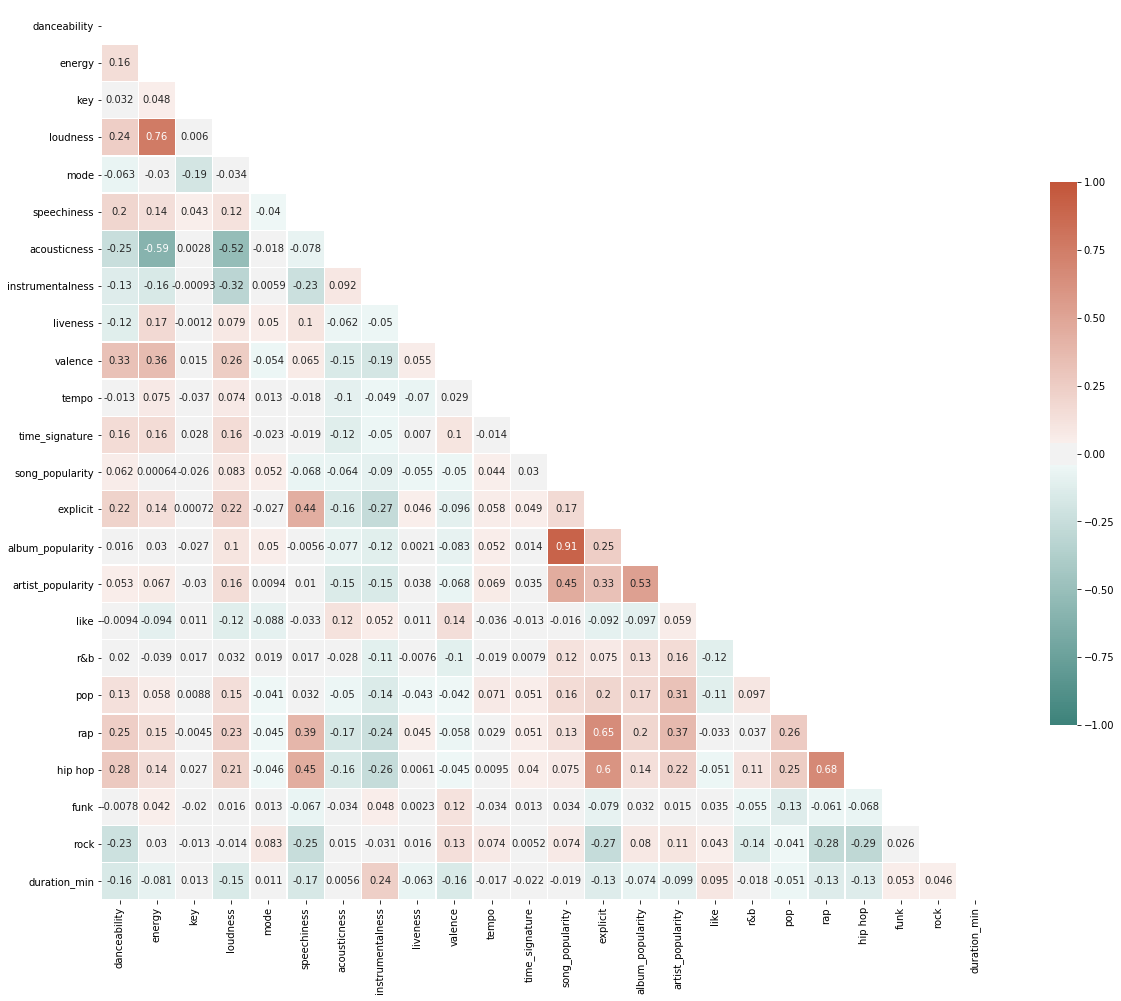

In [27]:
correlation = df.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

### Voting Classifier

In [28]:
models = [log_mod.clf, random_forest_mod.clf, lda_mod.clf, qda_mod.clf, knn_mod.clf, dec_tree_mod.clf, nb_mod.clf, svc_mod.clf]

#### Hard Voting

In [29]:
models_ens = list(zip(['LR', 'RF', 'LDA', 'QDA', 'KNN', 'DT', 'NB', 'SVM'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'N/A'

#### Soft Voting

In [30]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
prob = model_ens.predict_proba(X_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [31]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling Hard', 'Ensembling Soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensebling Hard,0.651261,0.644172,0.492958,0.558511,N/A
1,Ensembling Soft,0.642857,0.621469,0.516432,0.564103,0.712812


### Neural Network

In [32]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [33]:
len(X.columns)

23

In [51]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.h1 = nn.Linear(in_features=23, out_features=64)
        self.h2 = nn.Linear(in_features = 64, out_features = 128)
        self.h3 = nn.Linear(in_features=128, out_features = 256)
        self.h4 = nn.Linear(in_features=256, out_features=1)

        self.rl1 = nn.ReLU()
        self.rl2 = nn.ReLU()
        self.rl3 = nn.ReLU()
        self.sm1 = nn.Softmax(dim=1)
        
        
    def forward(self, x):
        x = self.h1(x)
        x = self.rl1(x)
        x = self.h2(x)
        x = self.rl2(x)
        x = self.h3(x)
        x = self.rl3(x)
        x = self.h4(x)
        x = self.sm1(x)
        
        return x

In [36]:
import torch.utils.data as data_utils

In [52]:
y_tens = torch.Tensor(np.array(y.astype(int)))
#y_tens = y_tens.type(torch.LongTensor)
train = data_utils.TensorDataset(torch.Tensor(np.array(X.astype(int))), y_tens)
train_loader = data_utils.DataLoader(train, batch_size = 10, shuffle = True)

In [38]:
# IGNORE THIS -- DON'T RUN 

class Dataset(torch.utils.data.Dataset):
    def __init__(self, list_ids, labels, df):
        self.labels = labels
        self.list_ids = list_ids
        
    def __len__(self):
        return len(self.list_ids)
    
    def __getitem__(self, index):
        idx = self.list_ids[index]
        
        X = df.loc[index, df.columns!='like']
        y = self.labels[idx]
      
        return X, y
    

In [39]:
#params = {'batch_size': 64, 'shuffle': True, 'num_workers': 1}

#training_set = Dataset(list_ids, labels, df)
#train_loader = torch.utils.data.DataLoader(training_set, **params)

In [53]:
nn_mod1 = Net()
optimizer = optim.Adam(nn_mod1.parameters(), lr=0.001) 
lossfun = nn.BCELoss()

In [54]:
def train(model, train_loader, epochs): 
    
    model.train() 
    
    epoch_loss = []
    epoch_accu = []
    
    
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            
            output = model(data)
            
            #target = target.squeeze(1)

            loss = lossfun(output, target)

            optimizer.zero_grad()
            
            loss.backward()
            
            optimizer.step()
            
            
            
            ##### Bookkeeping
            
            accuracy = (output.argmax(-1)==target).float().mean()
            epoch_loss.append(loss.item())
            epoch_accu.append(accuracy.item())
            
            if batch_idx % 50 == 0: 
                print('Train Epoch: {}[{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f}'.format(
                    epoch+1, batch_idx*len(data), len(train_loader.dataset), 
                    100. * batch_idx / len(train_loader), loss.item(), accuracy.item()))
                
            print('Train Epoch: {}\tAverage Loss: {:.6f}\tAverage Accuracy: {:.2f}'.format(
                epoch+1, sum(epoch_loss)/len(epoch_loss), sum(epoch_accu)/len(epoch_accu)))
                
        torch.save(model.state_dict(), 'nn_1.pt')

        return epoch_loss, epoch_accu

In [55]:
epoch_loss, epoch_accu = train(nn_mod1, train_loader, epochs=5)

Train Epoch: 1[0/2376 (0%)]	Loss: 50.000000	Accuracy: 0.50
Train Epoch: 1	Average Loss: 50.000000	Average Accuracy: 0.50
Train Epoch: 1	Average Loss: 50.000000	Average Accuracy: 0.50
Train Epoch: 1	Average Loss: 43.333333	Average Accuracy: 0.43
Train Epoch: 1	Average Loss: 40.000000	Average Accuracy: 0.40
Train Epoch: 1	Average Loss: 46.000000	Average Accuracy: 0.46
Train Epoch: 1	Average Loss: 50.000000	Average Accuracy: 0.50
Train Epoch: 1	Average Loss: 48.571429	Average Accuracy: 0.49
Train Epoch: 1	Average Loss: 47.500000	Average Accuracy: 0.48
Train Epoch: 1	Average Loss: 47.777778	Average Accuracy: 0.48
Train Epoch: 1	Average Loss: 50.000000	Average Accuracy: 0.50
Train Epoch: 1	Average Loss: 48.181818	Average Accuracy: 0.48
Train Epoch: 1	Average Loss: 47.500000	Average Accuracy: 0.48
Train Epoch: 1	Average Loss: 48.461538	Average Accuracy: 0.48
Train Epoch: 1	Average Loss: 48.571429	Average Accuracy: 0.49
Train Epoch: 1	Average Loss: 48.666667	Average Accuracy: 0.49
Train Epoch

Text(0, 0.5, 'accuracy')

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x1a216114d0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


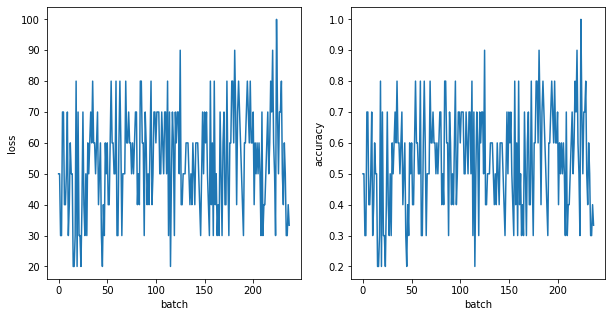

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

plt.plot(epoch_loss)
plt.xlabel('batch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(epoch_accu)
plt.xlabel('batch')
plt.ylabel('accuracy')


### Exploring the Logistic Regression Model

In [57]:
lm_preds = log_mod.generate_predictions(X_train, y_train, X_test)

log_mod.evaluate(y_test, lm_preds)

[[173  90]
 [ 83 130]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       263
           1       0.59      0.61      0.60       213

    accuracy                           0.64       476
   macro avg       0.63      0.63      0.63       476
weighted avg       0.64      0.64      0.64       476



In [58]:
# Shows probability predictions for test set ( [prob that y=0, prob that y=1] )

log_mod.clf.predict_proba(X_test)

array([[0.58599374, 0.41400626],
       [0.54508251, 0.45491749],
       [0.55794623, 0.44205377],
       [0.79186135, 0.20813865],
       [0.80349669, 0.19650331],
       [0.62548598, 0.37451402],
       [0.36940561, 0.63059439],
       [0.66810555, 0.33189445],
       [0.54621426, 0.45378574],
       [0.63012223, 0.36987777],
       [0.3908253 , 0.6091747 ],
       [0.56549   , 0.43451   ],
       [0.95522478, 0.04477522],
       [0.15514288, 0.84485712],
       [0.39805986, 0.60194014],
       [0.59402947, 0.40597053],
       [0.40662778, 0.59337222],
       [0.64027051, 0.35972949],
       [0.67363577, 0.32636423],
       [0.90029341, 0.09970659],
       [0.69905994, 0.30094006],
       [0.91694893, 0.08305107],
       [0.35840388, 0.64159612],
       [0.59901469, 0.40098531],
       [0.22306381, 0.77693619],
       [0.36964844, 0.63035156],
       [0.82284597, 0.17715403],
       [0.81952903, 0.18047097],
       [0.59685556, 0.40314444],
       [0.76554181, 0.23445819],
       [0.

### Exploring the Random Forest Model

In [59]:
rf_preds = random_forest_mod.generate_predictions(X_train, y_train, X_test)

In [60]:
random_forest_mod.evaluate(y_test, rf_preds)

[[200  63]
 [ 80 133]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       263
           1       0.68      0.62      0.65       213

    accuracy                           0.70       476
   macro avg       0.70      0.69      0.69       476
weighted avg       0.70      0.70      0.70       476



In [61]:
random_forest_mod.clf.predict_proba(X_test)

array([[0.62666667, 0.37333333],
       [0.825     , 0.175     ],
       [0.59      , 0.41      ],
       [0.63      , 0.37      ],
       [0.67      , 0.33      ],
       [0.66      , 0.34      ],
       [0.32      , 0.68      ],
       [0.48      , 0.52      ],
       [0.55      , 0.45      ],
       [0.7       , 0.3       ],
       [0.55      , 0.45      ],
       [0.675     , 0.325     ],
       [0.69      , 0.31      ],
       [0.38      , 0.62      ],
       [0.46      , 0.54      ],
       [0.7       , 0.3       ],
       [0.43      , 0.57      ],
       [0.44      , 0.56      ],
       [0.51      , 0.49      ],
       [0.64      , 0.36      ],
       [0.53      , 0.47      ],
       [0.52      , 0.48      ],
       [0.41      , 0.59      ],
       [0.56666667, 0.43333333],
       [0.47      , 0.53      ],
       [0.42      , 0.58      ],
       [0.71      , 0.29      ],
       [0.61      , 0.39      ],
       [0.59      , 0.41      ],
       [0.56      , 0.44      ],
       [0.

# Introducing the "test" dataset (Janna's music library)

#### This is Janna's music library, of 1100 songs:

In [75]:
rec_df = pd.read_csv('recommenders_library.csv', index_col=0)
rec_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_popularity,explicit,artists,genres,album_popularity,artist_popularity
0,0.350,0.120,3.0,-11.104,0.0,0.0393,0.9820,0.000289,0.103,0.121,68.995,202200.0,4.0,73.0,False,['Frank Ocean'],"[['alternative r&b', 'hip hop', 'lgbtq+ hip ho...",[66],[86]
1,0.747,0.458,6.0,-6.891,1.0,0.3030,0.4510,0.000000,0.252,0.470,75.029,182000.0,4.0,74.0,False,['Ariana Grande'],"[['dance pop', 'pop', 'post-teen pop']]",[89],[95]
2,0.538,0.640,7.0,-7.957,1.0,0.2810,0.0727,0.000027,0.841,0.445,59.077,245206.0,4.0,55.0,False,"['Teyana Taylor', 'Ms. Lauryn Hill']","[['alternative r&b', 'deep pop r&b', 'hip pop'...","[48, 48]","[70, 72]"
3,0.829,0.797,5.0,-5.428,1.0,0.1090,0.0617,0.000000,0.112,0.549,97.972,171133.0,4.0,81.0,False,['Aya Nakamura'],[['basshall']],[79],[77]
4,0.518,0.762,7.0,-3.907,1.0,0.0305,0.0851,0.000000,0.148,0.271,155.985,285138.0,4.0,66.0,False,['December Avenue'],"[['opm', 'pinoy indie', 'pinoy pop punk', 'pin...",[60],[68]


**Import test dataset with 'uri' and take just that column**

In [76]:
# This is the uri column (to concatenate with the "test")
df_w_uri = pd.read_csv('recs_library_2.csv', index_col=0)
uri = df_w_uri.loc[:, 'uri']
uri = pd.DataFrame(uri)

In [78]:
rec_df['uri'] = uri

### Data Cleaning

#### Drop NA's

In [81]:
rec_df = rec_df.dropna()
rec_df = rec_df.reset_index(drop=True)

#### Cleans Popularity Values

In [82]:
# album popularity

for i in range(len(rec_df)):
    n = rec_df.loc[i, 'album_popularity']
    if type(n) == str:
        n = n[1:-1].split(',')
        n = int(n[0])
        rec_df.loc[i, 'album_popularity'] = n    
    
    
# artist_popularity -- from string to int (mean of all artists)

for i in range(len(rec_df)):
    n = rec_df.loc[i, 'artist_popularity']
    if type(n) == str:
        n = n[1:-1].split(',')
    
        for j in range(len(n)):
            n[j] = int(n[j])
        
        n = statistics.mean(n)
        rec_df.loc[i, 'artist_popularity'] = n

In [83]:
rec_df['r&b'] = 0
rec_df['pop'] = 0
rec_df['rap'] = 0
rec_df['hip hop'] = 0
rec_df['funk'] = 0
rec_df['rock'] = 0

for i in range(len(rec_df)):
    genres = rec_df.loc[i, 'genres']
    if 'hip hop' in genres:
        rec_df.loc[i, 'hip hop'] = 1
    if 'pop' in genres:
        rec_df.loc[i, 'pop'] = 1
    if 'rap' in genres:
        rec_df.loc[i, 'rap'] = 1
    if 'r&b' in genres:
        rec_df.loc[i, 'r&b'] = 1
    if 'funk' in genres:
        rec_df.loc[i, 'funk'] = 1
    if 'rock' in genres:
        rec_df.loc[i, 'rock'] = 1

In [84]:
rec_df = rec_df.drop(['artists', 'genres'], axis=1)
rec_df['explicit'] = (rec_df['explicit']==True).astype(int)
rec_df['duration_min'] = (rec_df['duration_ms']/(1000*60))%60
rec_df = rec_df.drop('duration_ms',axis = 1)

In [85]:
rec_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,album_popularity,artist_popularity,uri,r&b,pop,rap,hip hop,funk,rock,duration_min
0,0.350,0.120,3.0,-11.104,0.0,0.0393,0.9820,0.000289,0.103,0.121,...,66,86,spotify:track:72794Eag03xdy7TO0KNuid,1,1,0,1,0,0,3.370000
1,0.747,0.458,6.0,-6.891,1.0,0.3030,0.4510,0.000000,0.252,0.470,...,89,95,spotify:track:4uTvPEr01pjTbZgl7jcKBD,0,1,0,0,0,0,3.033333
2,0.538,0.640,7.0,-7.957,1.0,0.2810,0.0727,0.000027,0.841,0.445,...,48,71,spotify:track:40cayr7aVuRU8lXVn1PSpx,1,1,1,1,0,0,4.086767
3,0.829,0.797,5.0,-5.428,1.0,0.1090,0.0617,0.000000,0.112,0.549,...,79,77,spotify:track:7sKDftgGirHWTVFMtJoDoh,0,0,0,0,0,0,2.852217
4,0.518,0.762,7.0,-3.907,1.0,0.0305,0.0851,0.000000,0.148,0.271,...,60,68,spotify:track:00mBzIWv5gHOYxwuEJXjOG,0,1,0,0,0,1,4.752300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,0.516,0.154,4.0,-22.100,1.0,0.0383,0.9870,0.038300,0.115,0.451,...,66,61,spotify:track:2JyEK1FvLHhymbCw7Mf1S6,0,1,0,0,0,1,3.993917
1095,0.423,0.178,8.0,-13.218,1.0,0.0498,0.8540,0.000000,0.108,0.383,...,6,75,spotify:track:2d40kroNsSMLNHMC04wQ9P,0,1,0,0,0,0,3.235333
1096,0.481,0.262,7.0,-15.730,1.0,0.0414,0.7350,0.011400,0.832,0.375,...,0,59,spotify:track:5MVrZa7cDtnAoMvCgRAMqb,1,0,0,0,0,0,5.579067
1097,0.471,0.352,2.0,-9.699,1.0,0.0391,0.6330,0.000028,0.115,0.102,...,6,83,spotify:track:6fracv4du3sDwo1XKcPrkw,0,0,0,0,0,1,4.705483


In [86]:
print("# of r&b songs in this df: " + str(sum(rec_df['r&b'])))
print("# of pop songs in this df: " + str(sum(rec_df['pop'])))
print("# of rap songs in this df: " + str(sum(rec_df['rap'])))
print("# of hip hop songs in this df: " + str(sum(rec_df['hip hop'])))
print("# of funk songs in this df: " + str(sum(rec_df['funk'])))
print("# of rock songs in this df: " + str(sum(rec_df['rock'])))

# of r&b songs in this df: 404
# of pop songs in this df: 578
# of rap songs in this df: 368
# of hip hop songs in this df: 327
# of funk songs in this df: 46
# of rock songs in this df: 143


### Using the Random Forest Model

In [87]:
rec_test = rec_df.loc[:, rec_df.columns!='uri']
rec_test.shape

(1099, 23)

**Adds the Predicted Class to the final dataset**

In [88]:
rec_df['rf_pred_class'] = random_forest_mod.clf.predict(rec_test)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,artist_popularity,uri,r&b,pop,rap,hip hop,funk,rock,duration_min,rf_pred_class
0,0.350,0.120,3.0,-11.104,0.0,0.0393,0.9820,0.000289,0.103,0.121,...,86,spotify:track:72794Eag03xdy7TO0KNuid,1,1,0,1,0,0,3.370000,0
1,0.747,0.458,6.0,-6.891,1.0,0.3030,0.4510,0.000000,0.252,0.470,...,95,spotify:track:4uTvPEr01pjTbZgl7jcKBD,0,1,0,0,0,0,3.033333,0
2,0.538,0.640,7.0,-7.957,1.0,0.2810,0.0727,0.000027,0.841,0.445,...,71,spotify:track:40cayr7aVuRU8lXVn1PSpx,1,1,1,1,0,0,4.086767,0
3,0.829,0.797,5.0,-5.428,1.0,0.1090,0.0617,0.000000,0.112,0.549,...,77,spotify:track:7sKDftgGirHWTVFMtJoDoh,0,0,0,0,0,0,2.852217,1
4,0.518,0.762,7.0,-3.907,1.0,0.0305,0.0851,0.000000,0.148,0.271,...,68,spotify:track:00mBzIWv5gHOYxwuEJXjOG,0,1,0,0,0,1,4.752300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,0.516,0.154,4.0,-22.100,1.0,0.0383,0.9870,0.038300,0.115,0.451,...,61,spotify:track:2JyEK1FvLHhymbCw7Mf1S6,0,1,0,0,0,1,3.993917,1
1095,0.423,0.178,8.0,-13.218,1.0,0.0498,0.8540,0.000000,0.108,0.383,...,75,spotify:track:2d40kroNsSMLNHMC04wQ9P,0,1,0,0,0,0,3.235333,1
1096,0.481,0.262,7.0,-15.730,1.0,0.0414,0.7350,0.011400,0.832,0.375,...,59,spotify:track:5MVrZa7cDtnAoMvCgRAMqb,1,0,0,0,0,0,5.579067,1
1097,0.471,0.352,2.0,-9.699,1.0,0.0391,0.6330,0.000028,0.115,0.102,...,83,spotify:track:6fracv4du3sDwo1XKcPrkw,0,0,0,0,0,1,4.705483,1


**Adds the probability liked and disliked of the track**

In [89]:
pp = pd.DataFrame(random_forest_mod.clf.predict_proba(rec_test))
pp.columns = ['rf_pred_disliked', 'rf_pred_liked']

In [90]:
rec_df = pd.concat([rec_df, pp], axis =1)

**Now this is the new dataset with predicted probabilities of liked/disliked that will be used to recommend music** 

To just play around with the dataset a bit more,

In [91]:
rec_df.sort_values(by=['rf_pred_liked'], ascending=False)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,r&b,pop,rap,hip hop,funk,rock,duration_min,rf_pred_class,rf_pred_disliked,rf_pred_liked
522,0.612,0.1560,3.0,-15.823,1.0,0.0396,0.96200,0.002600,0.1020,0.415,...,0,0,0,0,0,0,5.080450,1,0.040000,0.960000
190,0.507,0.4230,2.0,-14.187,0.0,0.0332,0.83000,0.009160,0.0973,0.701,...,0,0,0,0,0,0,4.286883,1,0.040000,0.960000
193,0.397,0.0638,3.0,-19.326,0.0,0.0523,0.99200,0.905000,0.1150,0.221,...,0,0,0,0,0,0,3.952667,1,0.050000,0.950000
209,0.601,0.5320,10.0,-9.119,1.0,0.0286,0.43200,0.000006,0.0925,0.341,...,0,0,0,0,0,1,4.693550,1,0.060000,0.940000
192,0.601,0.5990,7.0,-8.898,1.0,0.0635,0.54900,0.106000,0.1420,0.636,...,0,0,0,0,0,0,3.171850,1,0.070000,0.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,0.640,0.6000,6.0,-7.270,1.0,0.0345,0.60300,0.468000,0.1090,0.161,...,0,0,0,0,0,0,3.174450,0,0.900000,0.100000
80,0.497,0.5500,2.0,-6.465,0.0,0.1920,0.66300,0.000052,0.2060,0.461,...,0,0,1,1,0,0,3.188367,0,0.900000,0.100000
357,0.544,0.8330,7.0,-6.903,1.0,0.0656,0.00595,0.030300,0.1320,0.241,...,0,1,0,0,0,1,3.900217,0,0.908333,0.091667
82,0.641,0.8070,0.0,-2.545,1.0,0.0560,0.04390,0.030400,0.2050,0.965,...,0,0,1,1,0,0,1.951217,0,0.910000,0.090000


**Exporting the final dataset to recommend songs from on web app:**

In [92]:
rec_df.to_csv('final_rec_df.csv')